In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np   
import seaborn as sns  
df = pd.read_csv('Archivos_higienizados/Higienizado_20240207.csv') 

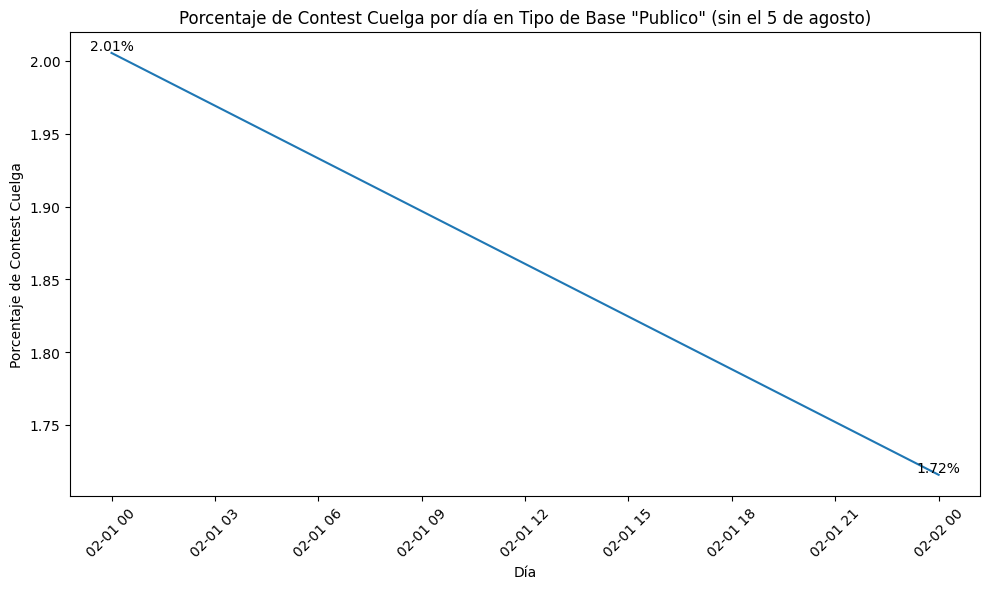

            Total Llamadas  Llamadas Contest Cuelga  Porcentaje Contest Cuelga
Dia                                                                           
2024-02-01            6582                      132                   2.005469
2024-02-02            3089                       53                   1.715766


: 

In [5]:

# Tu código para cargar y preparar los datos...

# Convertir la columna de fechas al formato datetime si aún no lo está
df['Fecha'] = pd.to_datetime(df['Fecha'])

# Extraer solo el día de la fecha
df['Dia'] = df['Fecha'].dt.date

# Filtrar los datos por tipo de base ('Publico', en este caso)
df_publico = df[df['Tipo_base'] == 'Privado']

# Filtrar los datos para excluir el 5 de agosto
df_publico_sin_5_agosto = df_publico[df_publico['Dia'] != pd.to_datetime('2023-08-05').date()]

# Calcular el total de llamadas por día para el tipo de base 'Publico' (sin el 5 de agosto)
total_llamadas_por_dia = df_publico_sin_5_agosto.groupby('Dia')['Connid'].count()

# Filtrar los datos para obtener solo las filas con SubTipificacion igual a 'CONTESTA Y CUELGA' en 'Publico'
contest_cuelga = df_publico_sin_5_agosto[df_publico_sin_5_agosto['SubTipificacion'] == 'CONTESTA Y CUELGA']

# Crear una tabla pivot para contar las llamadas 'CONTESTA Y CUELGA' por día en 'Publico' (sin el 5 de agosto)
pivot_table_contest_cuelga = pd.pivot_table(contest_cuelga, values='Connid', index='Dia', aggfunc='count')

# Combinar los resultados en un DataFrame
resultados = pd.DataFrame({
    'Total Llamadas': total_llamadas_por_dia,
    'Llamadas Contest Cuelga': pivot_table_contest_cuelga['Connid']
})

# Calcular el porcentaje de 'CONTESTA Y CUELGA' respecto al total de llamadas por día en 'Publico' (sin el 5 de agosto)
resultados['Porcentaje Contest Cuelga'] = (resultados['Llamadas Contest Cuelga'] / resultados['Total Llamadas']) * 100

# Graficar la tabla en un gráfico de línea utilizando Seaborn
plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=resultados, x=resultados.index, y='Porcentaje Contest Cuelga')

# Configurar detalles de la gráfica
plt.title('Porcentaje de Contest Cuelga por día en Tipo de Base "Publico" (sin el 5 de agosto)')
plt.xlabel('Día')
plt.ylabel('Porcentaje de Contest Cuelga')
plt.xticks(rotation=45)

# Agregar etiquetas de porcentaje a los puntos del gráfico
for x, y in zip(resultados.index, resultados['Porcentaje Contest Cuelga']):
    ax.text(x, y, f'{y:.2f}%', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()
print(resultados)

resultados.to_csv('Contesta y cuelga Privado.csv')



